## Extracting Lat Lons from Shape Files

In [1]:
import rasterio
import pandas as pd
from rasterio.transform import rowcol, xy

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Load the raster file
raster_path = "/home/incidence_rasters/summarization_code_and_files/admin2023_1_MG_5K.tif"
config_path = "/home/incidence_rasters/summarization_code_and_files/admin2023_1_MG_5K_config.csv"

# Read the config file
config = pd.read_csv(config_path)

# Open the raster file
with rasterio.open(raster_path) as src:
    # Get raster data and affine transform
    data = src.read(1)  # Assuming single-band raster
    transform = src.transform
    
    # Create a list to store results
    results = []
    
    # Iterate through each pixel
    for row in range(data.shape[0]):
        for col in range(data.shape[1]):
            raster_value = data[row, col]
            # Check if raster value is in config
            if raster_value in config['Raster_Value'].values:
                # Get latitude and longitude
                lon, lat = xy(transform, row, col)
                # Append to results
                results.append({
                    "Raster_Value": raster_value,
                    "Latitude": lat,
                    "Longitude": lon
                })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Merge with config file
final_df = pd.merge(config, results_df, on="Raster_Value")

# Save or inspect the output


In [ ]:
final_df.to_csv("/home/incidence_rasters/2024/data/output_with_coordinates.csv", index=False)

## Extracting incidence for each location from admin file

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import rasterio

raster_path = '/home/incidence_rasters/admn/admin2023_1_MG_5K.tif'
with rasterio.open(raster_path) as src:
    print(src.profile)


{'driver': 'GTiff', 'dtype': 'int32', 'nodata': -9999.0, 'width': 8640, 'height': 4320, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.041666666666665, 0.0, -180.0,
       0.0, -0.041666666666665, 90.0), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}


In [ ]:
import geopandas as gpd

vat_path = '/home/incidence_rasters/admn/admin2023_1_MG_5K.tif.vat.dbf'
gdf = gpd.read_file(vat_path)
print(gdf.head())


      Value      Count
0         0  8731696.0
1  10015048     2637.0
2  10015049     2552.0
3  10015050     2444.0
4  10015051     6216.0


In [ ]:
import pandas as pd

config_path = '/home/admn/admin2023_1_MG_5K_config.csv'
config_df = pd.read_csv(config_path)
print(config_df.head())
config_df = config_df.rename(columns={config_df.columns[0]: 'Value'})
print('Column change')
print(config_df.head())


   Raster_Value  ISO  Admn_Level       Name_0      ID_0 Code_0   Type_0  \
0      10316303  AFG           1  Afghanistan  10000777      1  Country   
1      10313664  AFG           1  Afghanistan  10000777      1  Country   
2      10315985  AFG           1  Afghanistan  10000777      1  Country   
3      10313775  AFG           1  Afghanistan  10000777      1  Country   
4      10313718  AFG           1  Afghanistan  10000777      1  Country   

       Name_1      ID_1 Code_1    Type_1     Source    area_id  
0  Badakhshan  10316303    272  Province  GAUL 2015  938194570  
1     Badghis  10313664    273  Province  GAUL 2015  938194571  
2     Baghlan  10315985    274  Province  GAUL 2015  938194572  
3       Balkh  10313775    275  Province  GAUL 2015  938194573  
4      Bamyan  10313718    276  Province  GAUL 2015  938194574  
Column change
      Value  ISO  Admn_Level       Name_0      ID_0 Code_0   Type_0  \
0  10316303  AFG           1  Afghanistan  10000777      1  Country   
1  

In [ ]:
# Merge the VAT data with the config file on 'value'
merged_config = gdf.merge(config_df, on='Value', how='left')
print(merged_config.head())
merged_config.to_csv('/home/incidence_rasters/2024/data/merged_admn.csv', index=False)

      Value      Count  ISO  Admn_Level                            Name_0  \
0         0  8731696.0  NaN         NaN                               NaN   
1  10015048     2637.0  COD         1.0  Democratic Republic of the Congo   
2  10015049     2552.0  COD         1.0  Democratic Republic of the Congo   
3  10015050     2444.0  COD         1.0  Democratic Republic of the Congo   
4  10015051     6216.0  COD         1.0  Democratic Republic of the Congo   

         ID_0 Code_0   Type_0       Name_1        ID_1 Code_1    Type_1  \
0         NaN    NaN      NaN          NaN         NaN    NaN       NaN   
1  10000839.0    NaN  Country      Mongala  10015048.0    406  Province   
2  10000839.0    NaN  Country  Nord-Ubangi  10015049.0    405  Province   
3  10000839.0    NaN  Country   Sud-Ubangi  10015050.0    403  Province   
4  10000839.0    NaN  Country      Tshuapa  10015051.0    407  Province   

                                 Source      area_id  
0                              

In [ ]:
df1 = pd.read_csv('/home/incidence_rasters/data.for.KC/combined.exact.csv')
df2 = pd.read_csv('/home/incidence_rasters/2024/data/output_with_coordinates.csv')

/tmp/ipykernel_478763/2229510753.py:2: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/home/sjbhatt/kc_malaria_files/incidence_rasters/2024/data/output_with_coordinates.csv')


In [15]:
print(df1.columns)
print(df2.columns)

Index(['ISO', 'Admn_Level', 'Name_0', 'ID_0', 'Code_0', 'Type_0', 'Name_1',
       'ID_1', 'Code_1', 'Type_1', 'Source', 'year', 'pop',
       'incidence_rate_rmean', 'incidence_rate_LCI', 'incidence_rate_median',
       'incidence_rate_UCI', 'GBD_rmean', 'GBD_LCI', 'GBD_median', 'GBD_UCI',
       'GBD_model'],
      dtype='object')
Index(['Raster_Value', 'ISO', 'Admn_Level', 'Name_0', 'ID_0', 'Code_0',
       'Type_0', 'Name_1', 'ID_1', 'Code_1', 'Type_1', 'Source', 'area_id',
       'Latitude', 'Longitude'],
      dtype='object')


In [ ]:
raster_coord = pd.merge(df1, df2, on=['ID_0', 'ID_1'], how='left')
raster_coord.to_csv('/home/incidence_rasters/2024/data/raster_coords2000.csv', index=False)

In [ ]:
df2000 = pd.read_csv('/home/incidence_rasters/2024/data/raster_coords2000.csv')
df2024 = pd.read_csv('/home/incidence_rasters/2024/data/raster_coords2024.csv')

/tmp/ipykernel_478763/1586599162.py:1: DtypeWarning: Columns (4,8,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df2000 = pd.read_csv('/home/sjbhatt/kc_malaria_files/incidence_rasters/2024/data/raster_coords2000.csv')
/tmp/ipykernel_478763/1586599162.py:2: DtypeWarning: Columns (4,8,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df2024 = pd.read_csv('/home/sjbhatt/kc_malaria_files/incidence_rasters/2024/data/raster_coords2024.csv')


## Cleaning Raster File

In [ ]:
df_2000 = pd.read_csv('/home/incidence_rasters/2024/data/2000_clean.csv')
df_2000 = df_2000.drop([ 'ISO_y', 'Admn_Level_y', 'Name_0_y', 'Code_0_y', 'Type_0_y', 'Name_1_y', 'Code_1_y', 'Type_1_y', 'Source_y'], axis=1)
df_2000 = df_2000.rename({'ISO_x':'ISO', 'Admn_Level_x':'Admn_Level', 'Name_0_x':'Name_0', 'Code_0_x':'Code_0','Type_0_x':'Type_0', 'Name_1_x':'Name_1', 'Code_1_x':'Code_1', 'Type_1_x':'Type_1', 'Source_x':'Source',}, axis=1)
df_2000.to_csv('/home/incidence_rasters/2024/data/raster2000_clean.csv', index=False)

/tmp/ipykernel_478763/1914437212.py:1: DtypeWarning: Columns (5,9,27,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2000 = pd.read_csv('/home/sjbhatt/kc_malaria_files/incidence_rasters/2024/data/2000_clean.csv')


In [ ]:
df_2000 = pd.read_csv('/home/incidence_rasters/2024/data/2024_clean.csv')
df_2000 = df_2000.drop([ 'ISO_y', 'Admn_Level_y', 'Name_0_y', 'Code_0_y', 'Type_0_y', 'Name_1_y', 'Code_1_y', 'Type_1_y', 'Source_y'], axis=1)
df_2000 = df_2000.rename({'ISO_x':'ISO', 'Admn_Level_x':'Admn_Level', 'Name_0_x':'Name_0', 'Code_0_x':'Code_0','Type_0_x':'Type_0', 'Name_1_x':'Name_1', 'Code_1_x':'Code_1', 'Type_1_x':'Type_1', 'Source_x':'Source',}, axis=1)
df_2000.to_csv('/home/incidence_rasters/2024/data/raster2024_clean.csv', index=False)

/tmp/ipykernel_478763/64691460.py:1: DtypeWarning: Columns (5,9,27,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2000 = pd.read_csv('/home/sjbhatt/kc_malaria_files/incidence_rasters/2024/data/2024_clean.csv')


## Dividing master raster into individual countries

In [ ]:
df = pd.read_csv('/home/incidence_rasters/2024/data/raster2024clean.csv')
print(df.head())

/tmp/ipykernel_489637/3181260295.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/sjbhatt/kc_malaria_files/incidence_rasters/2024/data/raster2024clean.csv')


   Unnamed: 0  ISO  Admn_Level                            Name_0      ID_0  \
0           0  COD           1  Democratic Republic of the Congo  10000839   
1           1  COD           1  Democratic Republic of the Congo  10000839   
2           2  COD           1  Democratic Republic of the Congo  10000839   
3           3  COD           1  Democratic Republic of the Congo  10000839   
4           4  COD           1  Democratic Republic of the Congo  10000839   

  Code_0   Type_0   Name_1      ID_1 Code_1  ...   GBD_UCI  \
0    NaN  Country  Mongala  10015048    406  ...  0.597299   
1    NaN  Country  Mongala  10015048    406  ...  0.597299   
2    NaN  Country  Mongala  10015048    406  ...  0.597299   
3    NaN  Country  Mongala  10015048    406  ...  0.597299   
4    NaN  Country  Mongala  10015048    406  ...  0.597299   

  incidence_rate_rmean  incidence_rate_LCI  incidence_rate_median  \
0             0.529409            0.405007               0.534486   
1             0.5294

In [ ]:
output_folder = '/home/incidence_rasters/2024/data/countries2024'
grouped = df.groupby('Name_0')

In [6]:
import os
for country, data in grouped:
    output_path = os.path.join(output_folder, f'{country}.csv')
    data.to_csv(output_path,index=False)
    

## Averaging admin 1 levels

In [ ]:
base_dir = '/home/incidence_rasters/2024/data/countries2024/'

output_dir = '/home/incidence_rasters/2024/data/countries2024_GBD_CI/'

In [11]:

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop through each country file in the base directory
for country_file in os.listdir(base_dir):
    # Check if the file is a CSV file
    if country_file.endswith('.csv'):
        # Extract the country name from the CSV file name (e.g., "Rwanda.csv" -> "Rwanda")
        country_name = country_file.split('.')[0]
        country_path = os.path.join(base_dir, country_file)

        print(f'Processing {country_name}...')

        # Load the country-specific CSV file (e.g., Rwanda.csv)
        df = pd.read_csv(country_path)

        # Group by district (admin level 1)
        grouped = df.groupby('Name_1')

        # Initialize lists to store results for districts
        districts = []
        avg_incidence = []
        lower_ci = []
        upper_ci = []
        avg_incidence_GBD = []
        lower_ci_GBD = []
        upper_ci_GBD = []

        # Initialize variables for country-level aggregation
        total_weighted_mean = 0
        total_weighted_lci = 0
        total_weighted_uci = 0
        total_population = 0
        total_weighted_mean_GBD = 0
        total_weighted_lci_GBD = 0
        total_weighted_uci_GBD = 0


        # Loop through each district group
        for district, group in grouped:
            # Get the population for this district (assuming it is the same for all rows within the district)
            population = group['pop'].iloc[0]

            # Calculate the weighted averages for incidence rate and its uncertainty
            weighted_mean = (group['incidence_rate_rmean'] * group['pop']).sum() / group['pop'].sum()
            weighted_lci = (group['incidence_rate_LCI'] * group['pop']).sum() / group['pop'].sum()
            weighted_uci = (group['incidence_rate_UCI'] * group['pop']).sum() / group['pop'].sum()
            weighted_mean_GBD = (group['GBD_rmean'] * group['pop']).sum() / group['pop'].sum()
            weighted_lci_GBD = (group['GBD_LCI'] * group['pop']).sum() / group['pop'].sum()
            weighted_uci_GBD = (group['GBD_UCI'] * group['pop']).sum() / group['pop'].sum()


            # Store results for each district
            districts.append(district)
            avg_incidence.append(weighted_mean)
            lower_ci.append(weighted_lci)
            upper_ci.append(weighted_uci)
            avg_incidence_GBD.append(weighted_mean_GBD)
            lower_ci_GBD.append(weighted_lci_GBD)
            upper_ci_GBD.append(weighted_uci_GBD)

            # Aggregate for country-level results
            total_weighted_mean += weighted_mean * population
            total_weighted_lci += weighted_lci * population
            total_weighted_uci += weighted_uci * population
            total_weighted_mean_GBD += weighted_mean_GBD * population
            total_weighted_lci_GBD += weighted_lci_GBD * population
            total_weighted_uci_GBD += weighted_uci_GBD * population
            total_population += population

        # Create a DataFrame with the results for districts
        results_df = pd.DataFrame({
            'District': districts,
            'Average Incidence Rate': avg_incidence,
            'Lower CI': lower_ci,
            'Upper CI': upper_ci,
            'GBD Average Incidence Rate': avg_incidence_GBD,
            'GBD Lower CI': lower_ci_GBD,
            'GBD Upper CI': upper_ci_GBD,
            
        })

        # Calculate the weighted averages for the entire country
        country_weighted_mean = total_weighted_mean / total_population
        country_weighted_lci = total_weighted_lci / total_population
        country_weighted_uci = total_weighted_uci / total_population
        country_weighted_mean_GBD = total_weighted_mean_GBD / total_population
        country_weighted_lci_GBD = total_weighted_lci_GBD / total_population
        country_weighted_uci_GBD = total_weighted_uci_GBD / total_population

        # Create a DataFrame for the country-level summary
        country_summary = pd.DataFrame({
            'District': [country_name],  # Use the country name instead of 'Entire Country'
            'Average Incidence Rate': [country_weighted_mean],
            'Lower CI': [country_weighted_lci],
            'Upper CI': [country_weighted_uci],
            'GBD Average Incidence Rate': [country_weighted_mean_GBD],
            'GBD Lower CI': [country_weighted_lci_GBD],
            'GBD Upper CI': [country_weighted_uci_GBD],
        })

        # Concatenate the country-level summary with the district-level results
        final_df = pd.concat([results_df, country_summary], ignore_index=True)

        # Save the results to the country_CIs directory with the appropriate filename
        output_file = os.path.join(output_dir, f'{country_name}_CI.csv')
        final_df.to_csv(output_file, index=False)

        print(f'Results for {country_name} saved to {output_file}')

Processing Gabon...
Results for Gabon saved to /home/sjbhatt/kc_malaria_files/incidence_rasters/2024/data/countries2024_GBD_CI/Gabon_CI.csv
Processing Burundi...
Results for Burundi saved to /home/sjbhatt/kc_malaria_files/incidence_rasters/2024/data/countries2024_GBD_CI/Burundi_CI.csv
Processing Botswana...
Results for Botswana saved to /home/sjbhatt/kc_malaria_files/incidence_rasters/2024/data/countries2024_GBD_CI/Botswana_CI.csv
Processing Sierra Leone...
Results for Sierra Leone saved to /home/sjbhatt/kc_malaria_files/incidence_rasters/2024/data/countries2024_GBD_CI/Sierra Leone_CI.csv
Processing South Sudan...
Results for South Sudan saved to /home/sjbhatt/kc_malaria_files/incidence_rasters/2024/data/countries2024_GBD_CI/South Sudan_CI.csv
Processing Kenya...
Results for Kenya saved to /home/sjbhatt/kc_malaria_files/incidence_rasters/2024/data/countries2024_GBD_CI/Kenya_CI.csv
Processing Namibia...
Results for Namibia saved to /home/sjbhatt/kc_malaria_files/incidence_rasters/2024/d

## Getting population values from first attempt @/home///incidence_rasters/countries_ci_GBD_pop 

I have forgotten how I added the population values in the first place but these values are correct so just appending from the last attempt

In [ ]:
df_ben = pd.read_csv('/home/incidence_rasters/2024/data/countries2024/Benin.csv')
df_unique = df_ben[['Name_1', 'pop']].drop_duplicates()
df_unique.to_csv('/home/incidence_rasters/2024/data/onlyPop_Benin.csv', index=False)

In [ ]:
# Define the directories
countries_ci_dir = '/home/incidence_rasters/countries_ci_GBD_pop'
final_plots_dir = '/home/incidence_rasters/final_plots/countries_GBD_CI'

# Get the list of CSV files in the countries_CI directory
countries_ci_files = [f for f in os.listdir(countries_ci_dir) if f.endswith('.csv')]

for file in countries_ci_files:
    # Load the CSV files
    countries_ci_df = pd.read_csv(os.path.join(countries_ci_dir, file))
    final_plots_df = pd.read_csv(os.path.join(final_plots_dir, file))

    # Ensure the 'pop' column exists in the countries_CI DataFrame
    if 'pop' in countries_ci_df.columns:
        # Add the 'pop' column to the final_plots DataFrame
        final_plots_df['pop'] = countries_ci_df['pop']

        # Save the updated DataFrame back to the final_plots directory
        final_plots_df.to_csv(os.path.join(final_plots_dir, file), index=False)

        print(f"Added 'pop' column to {file}")
    else:
        print(f"'pop' column not found in {file} from countries_CI directory.")

print("Adding 'pop' column complete for all files.")

Added 'pop' column to Kenya_CI.csv
Added 'pop' column to Angola_CI.csv
Added 'pop' column to Burundi_CI.csv
Added 'pop' column to Sierra Leone_CI.csv
Added 'pop' column to Zimbabwe_CI.csv
Added 'pop' column to Equatorial Guinea_CI.csv
Added 'pop' column to Burkina Faso_CI.csv
Added 'pop' column to South Sudan_CI.csv
Added 'pop' column to Chad_CI.csv
Added 'pop' column to South Africa_CI.csv
Added 'pop' column to Nigeria_CI.csv
Added 'pop' column to Senegal_CI.csv
Added 'pop' column to Mozambique_CI.csv
Added 'pop' column to Tanzania_CI.csv
Added 'pop' column to Mali_CI.csv
Added 'pop' column to Ethiopia_CI.csv
Added 'pop' column to Guinea-Bissau_CI.csv
Added 'pop' column to Somalia_CI.csv
Added 'pop' column to Gabon_CI.csv
Added 'pop' column to Botswana_CI.csv
Added 'pop' column to Eritrea_CI.csv
Added 'pop' column to Cameroon_CI.csv
Added 'pop' column to Niger_CI.csv
Added 'pop' column to Gambia_CI.csv
Added 'pop' column to Djibouti_CI.csv
Added 'pop' column to Sudan_CI.csv
Added 'pop

## Making a single CSV file on admin 0 level with incidence rates and pop

In [ ]:
import csv
input_directory = '/home/incidence_rasters/final_plots/countries_GBD_CI'
output_file = '/home/incidence_rasters/final_plots/admin_0_incidence.csv'

In [23]:
# List to store the last rows of all CSV files
last_rows = []
headers = None

# Loop through all the files in the directory
for filename in os.listdir(input_directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(input_directory, filename)

        # Open each CSV file and get the last row
        with open(file_path, 'r') as file:
            reader = csv.reader(file)
            rows = list(reader)

            # Get the headers from the first file
            if headers is None:
                headers = rows[0]

            last_row = rows[-1]  # Get the last row

            # Append the last row to the list
            last_rows.append(last_row)

# Write the headers and all the last rows into the output CSV file
with open(output_file, 'w', newline='') as output_csv:
    writer = csv.writer(output_csv)
    if headers:
        writer.writerow(headers)  # Write the headers
    writer.writerows(last_rows)



## Make population values float, sort by country name, change column header from district to country

In [ ]:
df = pd.read_csv('/home/incidence_rasters/final_plots/admin_0_incidence.csv')

df = df.rename(columns={'District': 'Country'})
df_sorted= df.sort_values('Country')
print(df_sorted.head())
df_sorted.to_csv('/home/incidence_rasters/final_plots/admin_0_incidence.csv', index=False)

         Country  Average Incidence Rate      Lower CI  Upper CI  \
31       Algeria            7.402700e-07  1.639187e-09  0.000005   
1         Angola            3.279812e-01  1.430225e-01  0.543041   
27         Benin            4.149796e-01  2.423406e-01  0.592058   
19      Botswana            5.759294e-03  3.518843e-03  0.008957   
6   Burkina Faso            5.939878e-01  4.646279e-01  0.733590   

    GBD Average Incidence Rate  GBD Lower CI  GBD Upper CI           pop  
31                    0.000097      0.000050      0.000173  3.056338e+05  
1                     0.291540      0.222027      0.369597  1.472483e+07  
27                    0.388728      0.296686      0.491904  6.580733e+06  
19                    0.170458      0.128303      0.221752  1.685831e+06  
6                     0.287729      0.224022      0.362524  1.234259e+07  


## Estimate number of cases from population and incidence rates

In [ ]:
df = pd.read_csv('/home/incidence_rasters/final_plots/admin_0_incidence.csv')

df['estimated_cases'] = df['Average Incidence Rate'] * df['pop']
df['estimated_cases_LCI'] = df['Lower CI'] * df['pop']
df['estimated_cases_UCI'] = df['Upper CI'] * df['pop']
df['estimated_cases_GBD'] = df['GBD Average Incidence Rate'] * df['pop']
df['estimated_cases_LCI_GBD'] = df['GBD Lower CI'] * df['pop']
df['estimated_cases_UCI_GBD'] = df['GBD Upper CI'] * df['pop']

df['estimated_cases'] = df['estimated_cases'].astype(int)
df['estimated_cases_LCI'] = df['estimated_cases_LCI'].astype(int)
df['estimated_cases_UCI'] =  df['estimated_cases_UCI'].astype(int)
df['estimated_cases_GBD'] =  df['estimated_cases_GBD'].astype(int)
df['estimated_cases_LCI_GBD'] =  df['estimated_cases_LCI_GBD'].astype(int)
df['estimated_cases_UCI_GBD'] =  df['estimated_cases_UCI_GBD'].astype(int)

In [ ]:
df.to_csv('/home/incidence_rasters/final_plots/admin_0_cases.csv',index=False)

### Admin 1

In [ ]:
import os
csv_dir = "/home/incidence_rasters/2024/data/countries2024_GBD_CI"
output_csv = "/home/incidence_rasters/2024/data/admin_1_updated_incidence.csv"
dataframes = []
for file in sorted(os.listdir(csv_dir)):
    if file.endswith(".csv"):
        file_path = os.path.join(csv_dir, file)
        df = pd.read_csv(file_path)

        if not df.empty:
            last_row = df.iloc[[-1]]
            rest = df.iloc[:-1]
            df_reordered = pd.concat([last_row, rest], ignore_index=True)
            dataframes.append(df_reordered)

merged_df = pd.concat(dataframes, ignore_index=True)

merged_df.to_csv(output_csv, index=False)

In [ ]:
df = pd.read_csv("/home/incidence_rasters/2024/data/admin_1_updated_cases_prepare.csv")
df['estimated_cases'] = df['Average Incidence Rate'] * df['pop']
df['estimated_cases_LCI'] = df['Lower CI'] * df['pop']
df['estimated_cases_UCI'] = df['Upper CI'] * df['pop']
#df['estimated_cases_GBD'] = df['GBD Average Incidence Rate'] * df['pop']
#df['estimated_cases_LCI_GBD'] = df['GBD Lower CI'] * df['pop']
#df['estimated_cases_UCI_GBD'] = df['GBD Upper CI'] * df['pop']

df['estimated_cases'] = df['estimated_cases'].astype(int)
df['estimated_cases_LCI'] = df['estimated_cases_LCI'].astype(int)
df['estimated_cases_UCI'] =  df['estimated_cases_UCI'].astype(int)
#df['estimated_cases_GBD'] =  df['estimated_cases_GBD'].astype(int)
#df['estimated_cases_LCI_GBD'] =  df['estimated_cases_LCI_GBD'].astype(int)
#df['estimated_cases_UCI_GBD'] =  df['estimated_cases_UCI_GBD'].astype(int)

df.to_csv("/home/incidence_rasters/2024/data/admin_1_updated_cases.csv", index=False)

## Maps- Comparison between GBD Estimates and Contrastive Estimates

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [ ]:
ras = pd.read_csv("/home/incidence_rasters/final_plots/corrected_raster_coords.csv")

### GBD Map

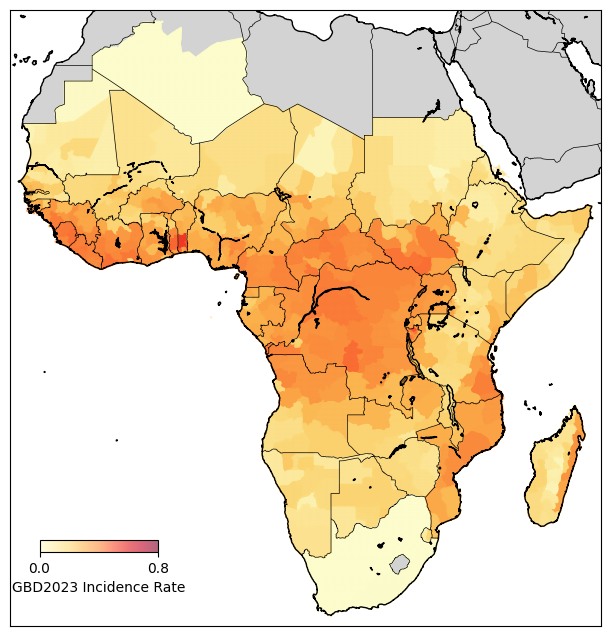

In [ ]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Define Basemap
m = Basemap(projection='merc', 
            llcrnrlat=ras['Latitude'].min() - 1, urcrnrlat=ras['Latitude'].max() + 1,
            llcrnrlon=ras['Longitude'].min() - 1, urcrnrlon=ras['Longitude'].max() + 1,
            resolution='i', ax=ax)

# Draw map features
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='lightblue')

# Normalize and scatter plot
norm = Normalize(vmin=0.0, vmax=0.8)
x, y = m(ras['Longitude'].values, ras['Latitude'].values)
sc = ax.scatter(x, y, c=ras['GBD_rmean'], cmap='YlOrRd', alpha=0.6, s=0.05, vmin=0, vmax=0.8)

# Create an inset axis for the color bar
cax = ax.inset_axes([0.05, 0.12, 0.2, 0.02])  # Adjust position and size as needed
cb = fig.colorbar(sc, cax=cax, orientation='horizontal')
cb.set_label('GBD2023 Incidence Rate')

# Set custom tick labels
cb.set_ticks([0.0, 0.8])  
cb.set_ticklabels(['0.0', '0.8'])

#plt.savefig('/home///incidence_rasters/regions/low.pdf')
#plt.savefig('/home///incidence_rasters/all.png')
#plt.savefig('/home///incidence_rasters/all.pdf')
plt.show()

### Estimates Map

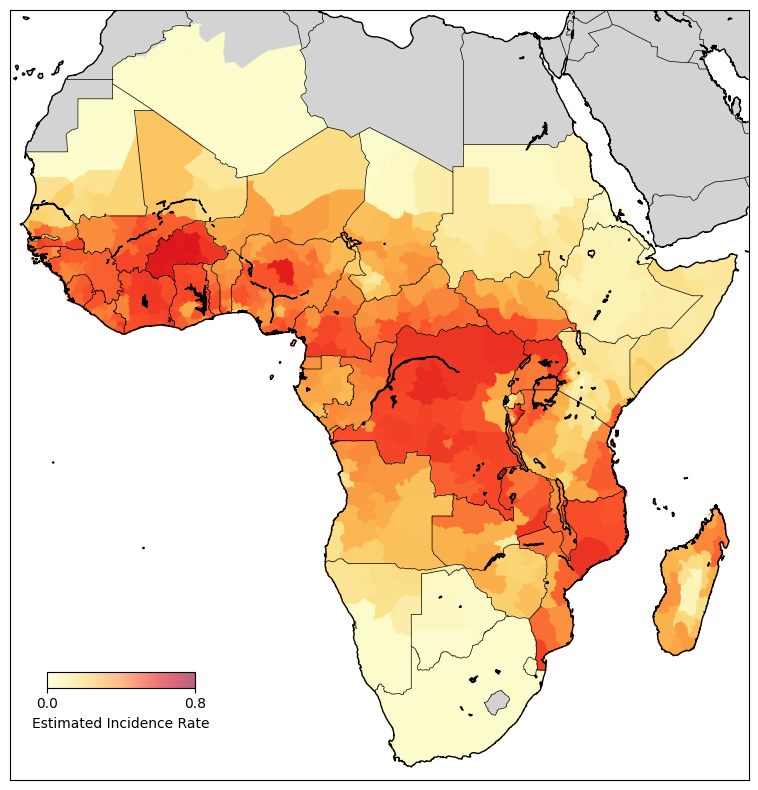

In [ ]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Define Basemap
m = Basemap(projection='merc', 
            llcrnrlat=ras['Latitude'].min() - 1, urcrnrlat=ras['Latitude'].max() + 1,
            llcrnrlon=ras['Longitude'].min() - 1, urcrnrlon=ras['Longitude'].max() + 1,
            resolution='i', ax=ax)

# Draw map features
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='lightblue')

# Normalize and scatter plot
norm = Normalize(vmin=0.0, vmax=0.8)
x, y = m(ras['Longitude'].values, ras['Latitude'].values)
sc = ax.scatter(x, y, c=ras['incidence_rate_rmean'], cmap='YlOrRd', alpha=0.6, s=0.05, vmin=0, vmax=0.8)

# Create an inset axis for the color bar
cax = ax.inset_axes([0.05, 0.12, 0.2, 0.02])  # Adjust position and size as needed
cb = fig.colorbar(sc, cax=cax, orientation='horizontal')
cb.set_label('Estimated Incidence Rate')

# Set custom tick labels
cb.set_ticks([0.0, 0.8])  
cb.set_ticklabels(['0.0', '0.8'])

plt.tight_layout()
plt.savefig('/home/incidence_rasters/final_plots/estimated_malaria_incidence.svg')
plt.savefig('/home/incidence_rasters/final_plots/estimated_malaria_incidence.png')
plt.show()


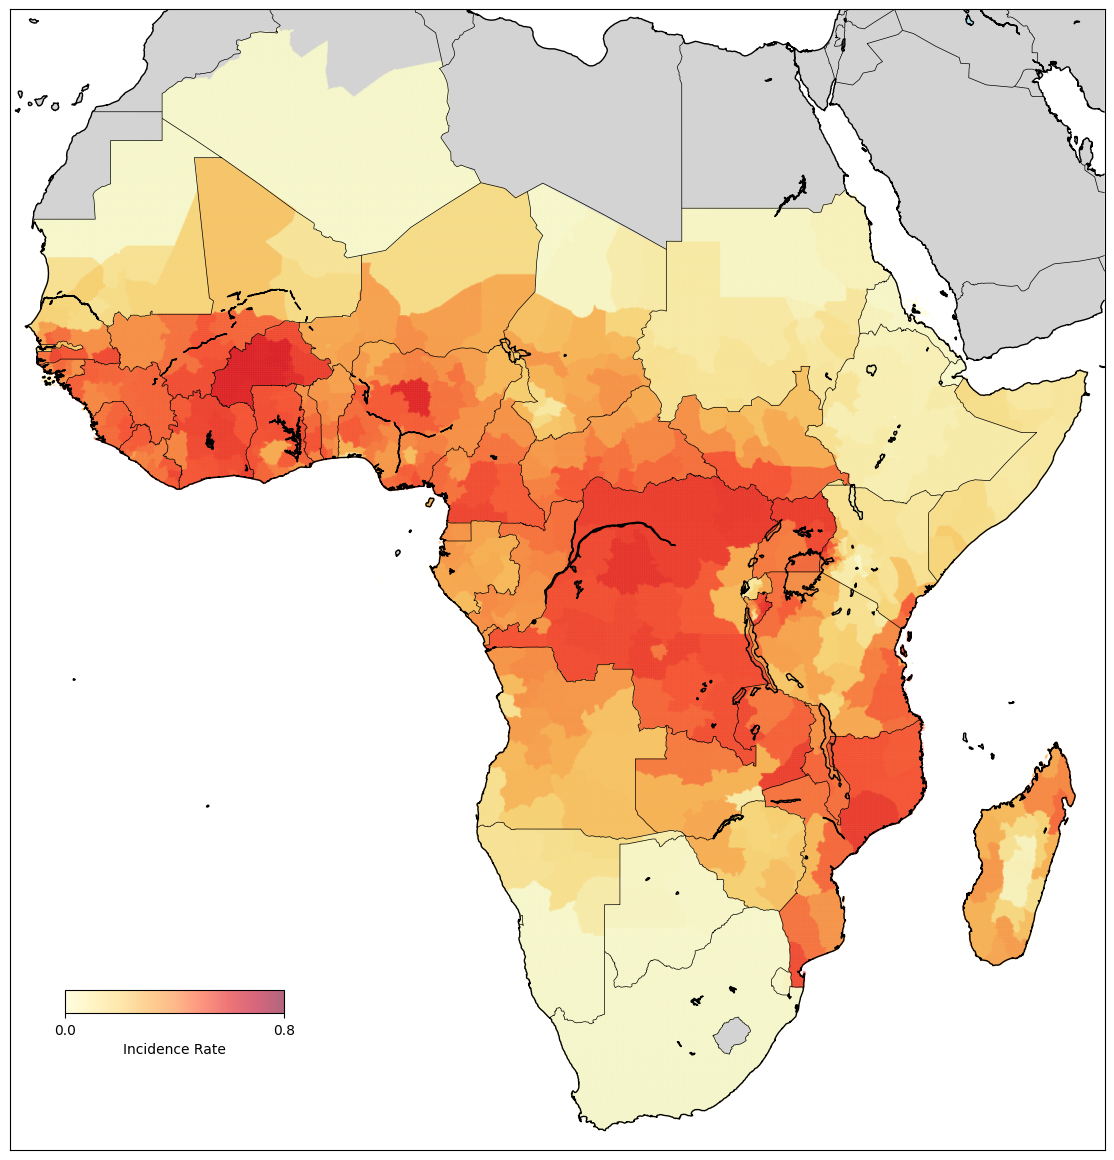

In [ ]:
# Compute aspect ratio for optimal figure size
lon_range = ras['Longitude'].max() - ras['Longitude'].min()
lat_range = ras['Latitude'].max() - ras['Latitude'].min()
aspect_ratio = lat_range / lon_range  
base_width = 12  # Adjust if needed
fig_height = base_width * aspect_ratio  

# Create figure with dynamic size
fig, ax = plt.subplots(figsize=(base_width, fig_height))

# Define Basemap
m = Basemap(projection='merc', 
            llcrnrlat=ras['Latitude'].min() - 1, urcrnrlat=ras['Latitude'].max() + 1,
            llcrnrlon=ras['Longitude'].min() - 1, urcrnrlon=ras['Longitude'].max() + 1,
            resolution='i', ax=ax)

# Draw map features
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='lightblue')

# Normalize and scatter plot
norm = Normalize(vmin=0.0, vmax=0.8)
x, y = m(ras['Longitude'].values, ras['Latitude'].values)
sc = ax.scatter(x, y, c=ras['incidence_rate_rmean'], cmap='YlOrRd', alpha=0.6, s=0.05, vmin=0, vmax=0.8)

# Create an inset axis for the color bar
cax = ax.inset_axes([0.05, 0.12, 0.2, 0.02])  # Adjust position
cb = fig.colorbar(sc, cax=cax, orientation='horizontal')
cb.set_label('Incidence Rate')

# Set custom tick labels
cb.set_ticks([0.0, 0.8])  
cb.set_ticklabels(['0.0', '0.8'])

plt.tight_layout()
plt.savefig('/home/incidence_rasters/final_plots/c_estimated_malaria_incidence.svg')
plt.savefig('/home/incidence_rasters/final_plots/c_estimated_malaria_incidence.png')
plt.show()

## Region Plotting

In [25]:
import os
import pandas as pd 
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [ ]:
df = pd.read_csv("/home/incidence_rasters/final_plots/corrected_raster_coords.csv")
print(len(df))


1257164


In [21]:
# Print unique country names
unique_countries = df["Name_0"].unique()
print(unique_countries)

['Democratic Republic of the Congo' 'Madagascar' 'Nigeria' 'Kenya' 'Sudan'
 'Congo' 'South Africa' 'Central African Republic' 'Benin' 'Angola'
 'Liberia' 'Burkina Faso' 'Senegal' 'Djibouti' 'Tanzania' 'Mauritania'
 'Mali' 'Eswatini' 'Gabon' 'Zambia' 'Guinea-Bissau' 'Guinea' 'Botswana'
 'Equatorial Guinea' 'Somalia' 'Ethiopia' 'Eritrea' 'Burundi' 'Togo'
 'Algeria' 'Chad' 'Mozambique' 'Niger' 'South Sudan' 'Namibia'
 "Côte d'Ivoire" 'Cameroon' 'Rwanda' 'Sierra Leone' 'Gambia' 'Zimbabwe'
 'Ghana' 'Malawi' 'Uganda']


### Dividing Raster into Country Regions based on WHO Classification

In [22]:
west_africa = ['Nigeria', 'Benin', 'Liberia', 'Burkina Faso', 'Senegal', 'Mauritania',  'Mali', 'Guinea-Bissau', 'Guinea', 'Togo', 'Niger',  "Côte d'Ivoire", 'Sierra Leone', 'Gambia', 'Ghana']

central_africa = ['Democratic Republic of the Congo', 'Congo', 'Central African Republic', 'Angola', 'Gabon', 'Equatorial Guinea', 'Burundi', 'Chad', 'Cameroon']

eastern_africa = [ 'Ethiopia', 'Kenya', 'Madagascar', 'Malawi', 'Mozambique', 'Rwanda', 'South Sudan', 'Uganda', 'Tanzania', 'Zambia', 'Zimbabwe']

low_africa = ['Botswana', 'Eritrea', 'Eswatini',  'Namibia', 'South Africa']

In [ ]:
west_df = df[df['Name_0'].isin(west_africa)]
west_df.to_csv('/home/incidence_rasters/final_plots/regions/west_admin0.csv', index=False)

central_df = df[df['Name_0'].isin(central_africa)]
central_df.to_csv('/home/incidence_rasters/final_plots/regions/central_admin0.csv', index=False)

east_df = df[df['Name_0'].isin(eastern_africa)]
east_df.to_csv('/home/incidence_rasters/final_plots/regions/east_admin0.csv', index=False)

low_df = df[df['Name_0'].isin(low_africa)]
low_df.to_csv('/home/incidence_rasters/final_plots/regions/low_admin0.csv', index=False)

### Plotting Regions

In [ ]:
ras_west = pd.read_csv('/home/incidence_rasters/final_plots/regions/west_admin0.csv')
ras_east = pd.read_csv('/home/incidence_rasters/final_plots/regions/east_admin0.csv')
ras_central = pd.read_csv('/home/incidence_rasters/final_plots/regions/central_admin0.csv')
ras_low = pd.read_csv('/home/incidence_rasters/final_plots/regions/low_admin0.csv')

### West

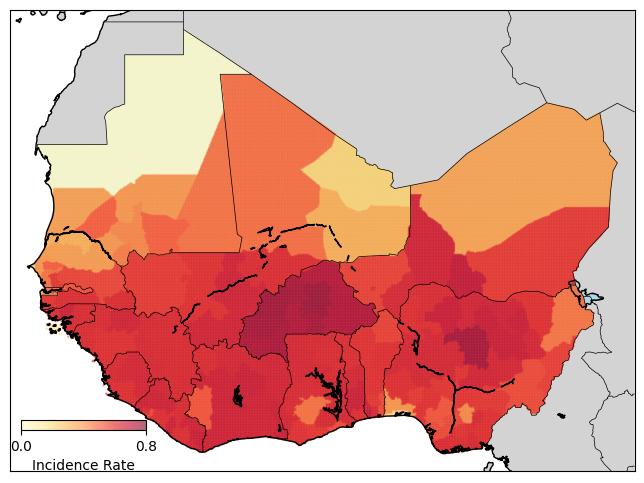

In [ ]:
# Compute aspect ratio for optimal figure size
lon_range = ras_west['Longitude'].max() - ras_west['Longitude'].min()
lat_range = ras_west['Latitude'].max() - ras_west['Latitude'].min()
aspect_ratio = lat_range / lon_range  
base_width = 12  # Adjust if needed
fig_height = base_width * aspect_ratio  

# Create figure with dynamic size
#fig, ax = plt.subplots(figsize=(base_width, fig_height))
fig, ax = plt.subplots(figsize=(10, 5))
# Define Basemap
m = Basemap(projection='merc', 
            llcrnrlat=ras_west['Latitude'].min() - 1, urcrnrlat=ras_west['Latitude'].max() + 1,
            llcrnrlon=ras_west['Longitude'].min() - 1, urcrnrlon=ras_west['Longitude'].max() + 1,
            resolution='i', ax=ax)

# Draw map features
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='lightblue')

# Normalize and scatter plot
norm = Normalize(vmin=0.0, vmax=0.8)
x, y = m(ras_west['Longitude'].values, ras_west['Latitude'].values)
sc = ax.scatter(x, y, c=ras_west['incidence_rate_UCI'], cmap='YlOrRd', alpha=0.6, s=0.05, vmin=0, vmax=0.8)

# Create an inset axis for the color bar
cax = ax.inset_axes([0.018, 0.09, 0.2, 0.02])  # Adjust position
cb = fig.colorbar(sc, cax=cax, orientation='horizontal')
cb.set_label('Incidence Rate', fontsize = 10)

# Set custom tick labels
cb.set_ticks([0.0, 0.8])  
cb.set_ticklabels(['0.0', '0.8'])

plt.tight_layout()
plt.savefig('/home/incidence_rasters/final_plots/west_estimated_malaria_incidence.svg')
plt.savefig('/home/incidence_rasters/final_plots/west_estimated_malaria_incidence.png')
plt.show()

### East

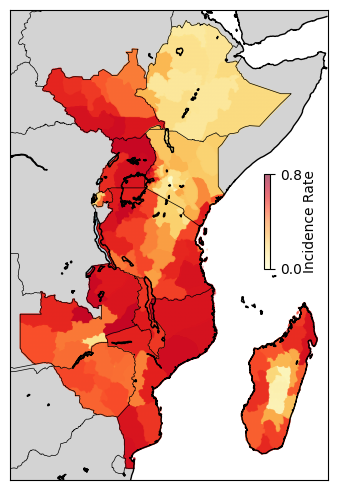

In [ ]:
# Compute aspect ratio for optimal figure size
lon_range = ras_east['Longitude'].max() - ras_east['Longitude'].min()
lat_range = ras_east['Latitude'].max() - ras_east['Latitude'].min()
aspect_ratio = lat_range / lon_range  
base_width = 12  # Adjust if needed
fig_height = base_width * aspect_ratio  

# Create figure with dynamic size
#fig, ax = plt.subplots(figsize=(base_width, fig_height))
fig, ax = plt.subplots(figsize=(10, 5))
# Define Basemap
m = Basemap(projection='merc', 
            llcrnrlat=ras_east['Latitude'].min() - 1, urcrnrlat=ras_east['Latitude'].max() + 1,
            llcrnrlon=ras_east['Longitude'].min() - 1, urcrnrlon=ras_east['Longitude'].max() + 1,
            resolution='i', ax=ax)

# Draw map features
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='lightblue')

# Normalize and scatter plot
norm = Normalize(vmin=0.0, vmax=0.8)
x, y = m(ras_east['Longitude'].values, ras_east['Latitude'].values)
sc = ax.scatter(x, y, c=ras_east['incidence_rate_UCI'], cmap='YlOrRd', alpha=0.6, s=0.05, vmin=0, vmax=0.8)

# Create an inset axis for the color bar
cax = ax.inset_axes([0.8, 0.45, 0.02, 0.2]) # Adjust position
cb = fig.colorbar(sc, cax=cax, orientation='vertical')
cb.set_label('Incidence Rate', fontsize = 10, labelpad=1)

# Set custom tick labels
cb.set_ticks([0.0, 0.8])  
cb.set_ticklabels(['0.0', '0.8'])

plt.tight_layout()
plt.savefig('/home/incidence_rasters/final_plots/east_estimated_malaria_incidence.svg')
plt.savefig('/home/incidence_rasters/final_plots/east_estimated_malaria_incidence.png')
plt.show()

### Central

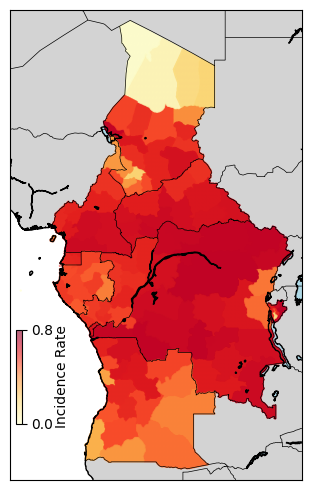

In [ ]:
# Compute aspect ratio for optimal figure size
lon_range = ras_central['Longitude'].max() - ras_central['Longitude'].min()
lat_range = ras_central['Latitude'].max() - ras_central['Latitude'].min()
aspect_ratio = lat_range / lon_range  
base_width = 12  # Adjust if needed
fig_height = base_width * aspect_ratio  

# Create figure with dynamic size
#fig, ax = plt.subplots(figsize=(base_width, fig_height))
fig, ax = plt.subplots(figsize=(10, 5))
# Define Basemap
m = Basemap(projection='merc', 
            llcrnrlat=ras_central['Latitude'].min() - 1, urcrnrlat=ras_central['Latitude'].max() + 1,
            llcrnrlon=ras_central['Longitude'].min() - 1, urcrnrlon=ras_central['Longitude'].max() + 1,
            resolution='i', ax=ax)

# Draw map features
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='lightblue')

# Normalize and scatter plot
norm = Normalize(vmin=0.0, vmax=0.8)
x, y = m(ras_central['Longitude'].values, ras_central['Latitude'].values)
sc = ax.scatter(x, y, c=ras_central['incidence_rate_UCI'], cmap='YlOrRd', alpha=0.6, s=0.05, vmin=0, vmax=0.8)

# Create an inset axis for the color bar
cax = ax.inset_axes([0.02, 0.12, 0.02, 0.2]) # Adjust position
cb = fig.colorbar(sc, cax=cax, orientation='vertical')
cb.set_label('Incidence Rate', fontsize = 10, labelpad=1)

# Set custom tick labels
cb.set_ticks([0.0, 0.8])  
cb.set_ticklabels(['0.0', '0.8'])

plt.tight_layout()
plt.savefig('/home/incidence_rasters/final_plots/central_estimated_malaria_incidence.svg')
plt.savefig('/home/incidence_rasters/final_plots/central_estimated_malaria_incidence.png')
plt.show()

### Low

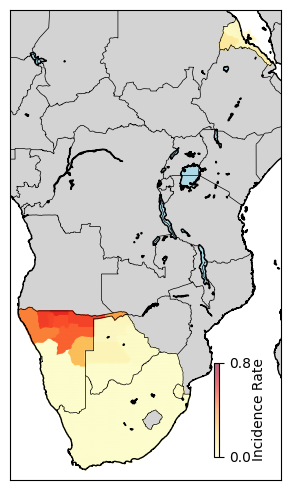

In [ ]:
# Compute aspect ratio for optimal figure size
lon_range = ras_low['Longitude'].max() - ras_low['Longitude'].min()
lat_range = ras_low['Latitude'].max() - ras_low['Latitude'].min()
aspect_ratio = lat_range / lon_range  
base_width = 12  # Adjust if needed
fig_height = base_width * aspect_ratio  

# Create figure with dynamic size
#fig, ax = plt.subplots(figsize=(base_width, fig_height))
fig, ax = plt.subplots(figsize=(10, 5))

# Define Basemap
m = Basemap(projection='merc', 
            llcrnrlat=ras_low['Latitude'].min() - 1, urcrnrlat=ras_low['Latitude'].max() + 1,
            llcrnrlon=ras_low['Longitude'].min() - 1, urcrnrlon=ras_low['Longitude'].max() + 1,
            resolution='i', ax=ax)

# Draw map features
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='lightblue')

# Normalize and scatter plot
norm = Normalize(vmin=0.0, vmax=0.8)
x, y = m(ras_low['Longitude'].values, ras_low['Latitude'].values)
sc = ax.scatter(x, y, c=ras_low['incidence_rate_UCI'], cmap='YlOrRd', alpha=0.6, s=0.05, vmin=0, vmax=0.8)

# Create an inset axis for the color bar
cax = ax.inset_axes([0.75, 0.05, 0.02, 0.2]) # Adjust position
cb = fig.colorbar(sc, cax=cax, orientation='vertical')
cb.set_label('Incidence Rate', fontsize = 10, labelpad=1)


# Set custom tick labels
cb.set_ticks([0.0, 0.8])  
cb.set_ticklabels(['0.0', '0.8'])

plt.tight_layout()
plt.savefig('/home/incidence_rasters/final_plots/low_estimated_malaria_incidence.svg')
plt.savefig('/home/incidence_rasters/final_plots/low_estimated_malaria_incidence.png')
plt.show()

## Plotting

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv("/home/incidence_rasters/2024/data/2024_Cases.csv", sep=';' ,encoding='utf-8')

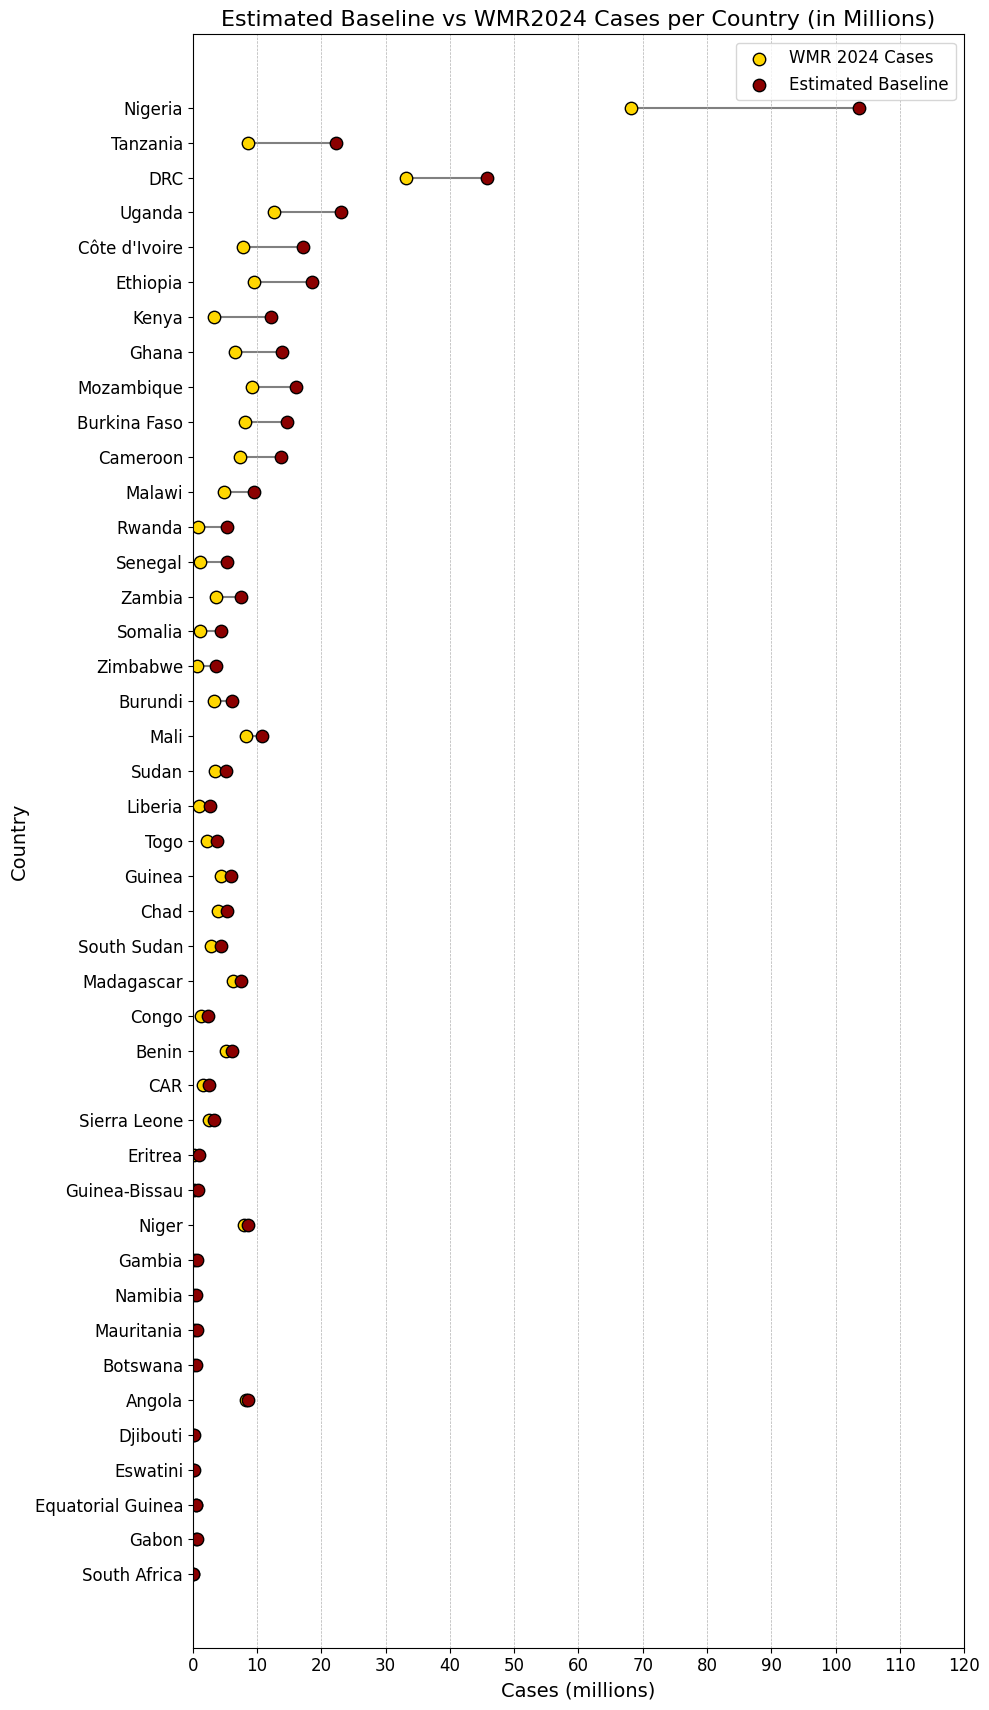

In [ ]:
# Rename columns
data = data.rename(columns={
    "Estimated Point Cases": "Estimated Baseline",
    "WMR Point": "WMR 2024 Cases"
})

# Calculate absolute difference and sort
data["Difference"] = abs(data["Estimated Baseline"] - data["WMR 2024 Cases"])
data_sorted = data.sort_values("Difference", ascending=True)

# Create plot
fig, ax = plt.subplots(figsize=(10, len(data_sorted) * 0.4))  # Adjusts height to number of countries

# Plot lines
for index, row in data_sorted.iterrows():
    ax.plot(
        [row["WMR 2024 Cases"], row["Estimated Baseline"]],
        [row["Country"], row["Country"]],
        color='gray',
        linewidth=1.5,
        zorder=1
    )

# Plot points
ax.scatter(data_sorted["WMR 2024 Cases"], data_sorted["Country"],
           color='gold', edgecolor='black', label='WMR 2024 Cases', s=80, zorder=2)
ax.scatter(data_sorted["Estimated Baseline"], data_sorted["Country"],
           color='darkred', edgecolor='black', label='Estimated Baseline', s=80, zorder=2)

# X-axis formatting
ax.set_xlim(0, 120)
ax.set_xticks(np.arange(0, 121, 10))
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Labels and title
ax.set_xlabel("Cases (millions)", fontsize=14)
ax.set_ylabel("Country", fontsize=14)
ax.set_title("Estimated Baseline vs WMR2024 Cases per Country (in Millions)", fontsize=16)

# Clean legend (no duplicates)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=12)
plt.tight_layout()
# Grid and layout
ax.grid(axis='x', linestyle='--', linewidth=0.5)
fig.savefig("/home/incidence_rasters/2024/plots/ladderplot.svg", format="svg", bbox_inches="tight")
fig.savefig("/home/incidence_rasters/2024/plots/ladderplot.pdf", format="pdf", bbox_inches="tight")
fig.savefig("/home/incidence_rasters/2024/plots/ladderplot.png", format="png", dpi=600, bbox_inches="tight")


plt.show()

### Region Plots

In [44]:
west_africa = ['Nigeria', 'Benin', 'Liberia', 'Burkina Faso', 'Senegal', 'Mauritania',  'Mali', 'Guinea-Bissau', 'Guinea', 'Togo', 'Niger',  "Côte d'Ivoire", 'Sierra Leone', 'Gambia', 'Ghana']

central_africa = ['Democratic Republic of the Congo', 'Congo', 'Central African Republic', 'Angola', 'Gabon', 'Equatorial Guinea', 'Burundi', 'Chad', 'Cameroon']

eastern_africa = [ 'Ethiopia', 'Kenya', 'Madagascar', 'Malawi', 'Mozambique', 'Rwanda', 'South Sudan', 'Uganda', 'Tanzania', 'Zambia', 'Zimbabwe']

low_africa = ['Botswana', 'Eritrea', 'Eswatini',  'Namibia', 'South Africa']

df_west = data[data['Country'].isin(west_africa)]
df_centre = data[data['Country'].isin(central_africa)]
df_east = data[data['Country'].isin(eastern_africa)]
df_low = data[data['Country'].isin(low_africa)]

/tmp/ipykernel_3403221/3398324763.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)


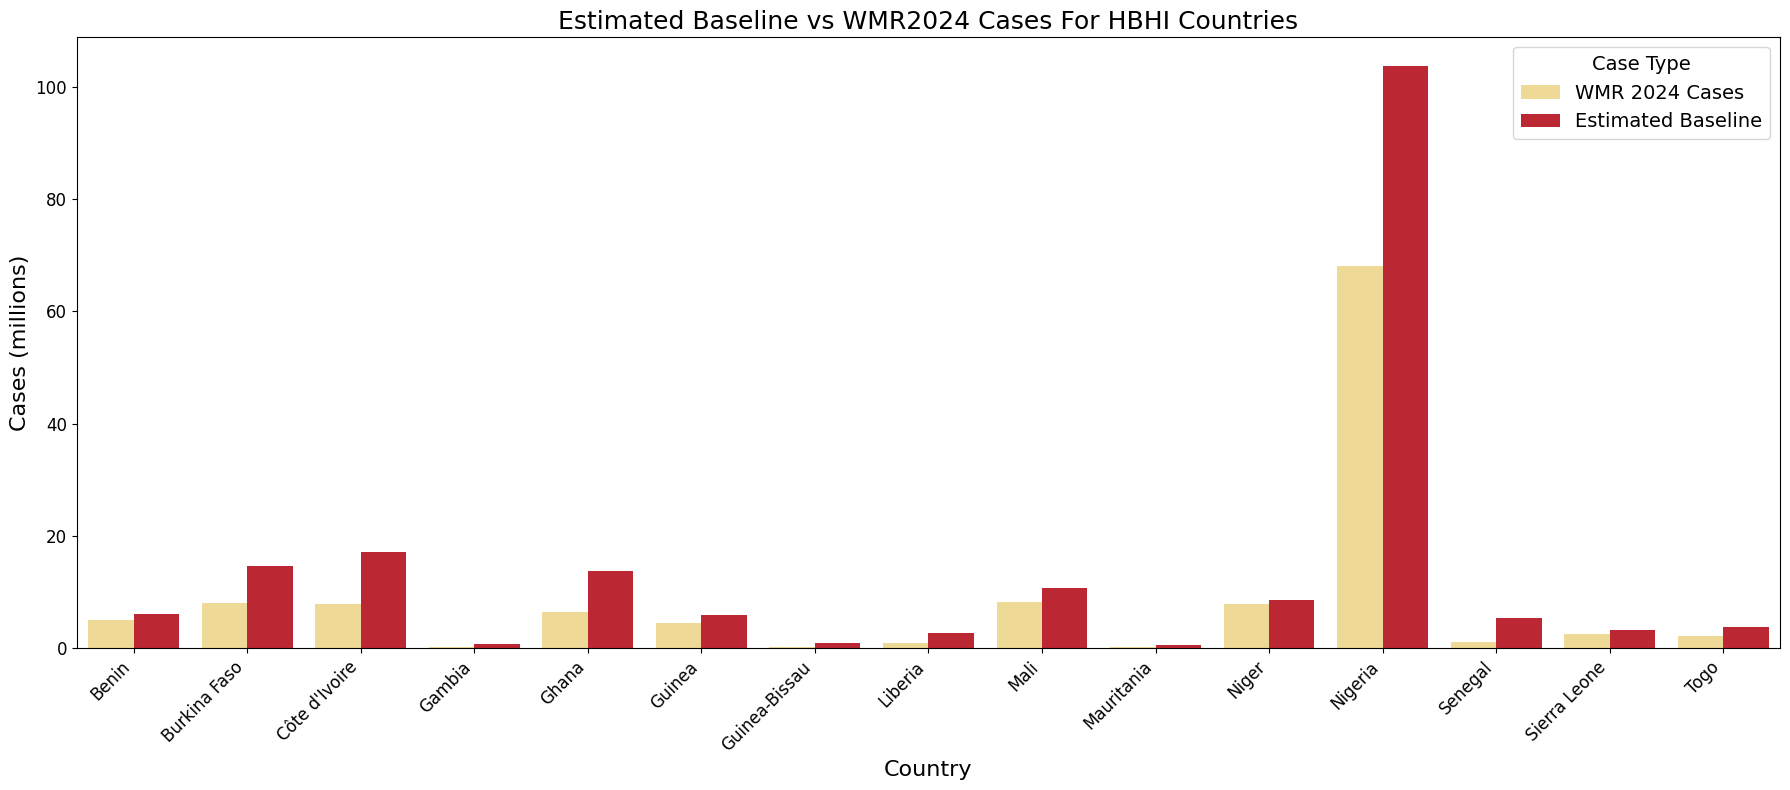

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Melt the data
data_melted = df_west.melt(
    id_vars=["Country"],
    value_vars=["Estimated Point Cases", "WMR Point"],
    var_name="Case Type",
    value_name="Cases (millions)"
)

# Rename case types
case_type_mapping = {
    "Estimated Point Cases": "Estimated Baseline",
    "WMR Point": "WMR 2024 Cases"
}
data_melted["Case Type"] = data_melted["Case Type"].map(case_type_mapping)

# Define color palette
cmap = plt.get_cmap("YlOrRd")
colors = [cmap(0.2), cmap(0.8)]  # Light yellow and dark red
order = ["WMR 2024 Cases", "Estimated Baseline"]

# Create figure
fig, ax = plt.subplots(figsize=(18, 8))  # Adjust width/height as needed

# Create the barplot
sns.barplot(
    data=data_melted,
    x="Country",
    y="Cases (millions)",
    hue="Case Type",
    hue_order=order,
    palette=colors,
    ax=ax
)

# Aesthetics and formatting
ax.set_xlabel("Country", fontsize=16)
ax.set_ylabel("Cases (millions)", fontsize=16)
ax.set_title("Estimated Baseline vs WMR2024 Cases For HBHI Countries", fontsize=18)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Clean legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=14, title="Case Type", title_fontsize=14)

# Layout optimization
plt.tight_layout()

# Save in high-res formats
fig.savefig("west_africa_barplot.svg", format="svg", bbox_inches="tight")
fig.savefig("west_africa_barplot.pdf", format="pdf", bbox_inches="tight")
fig.savefig("west_africa_barplot.png", format="png", dpi=600, bbox_inches="tight")

plt.show()


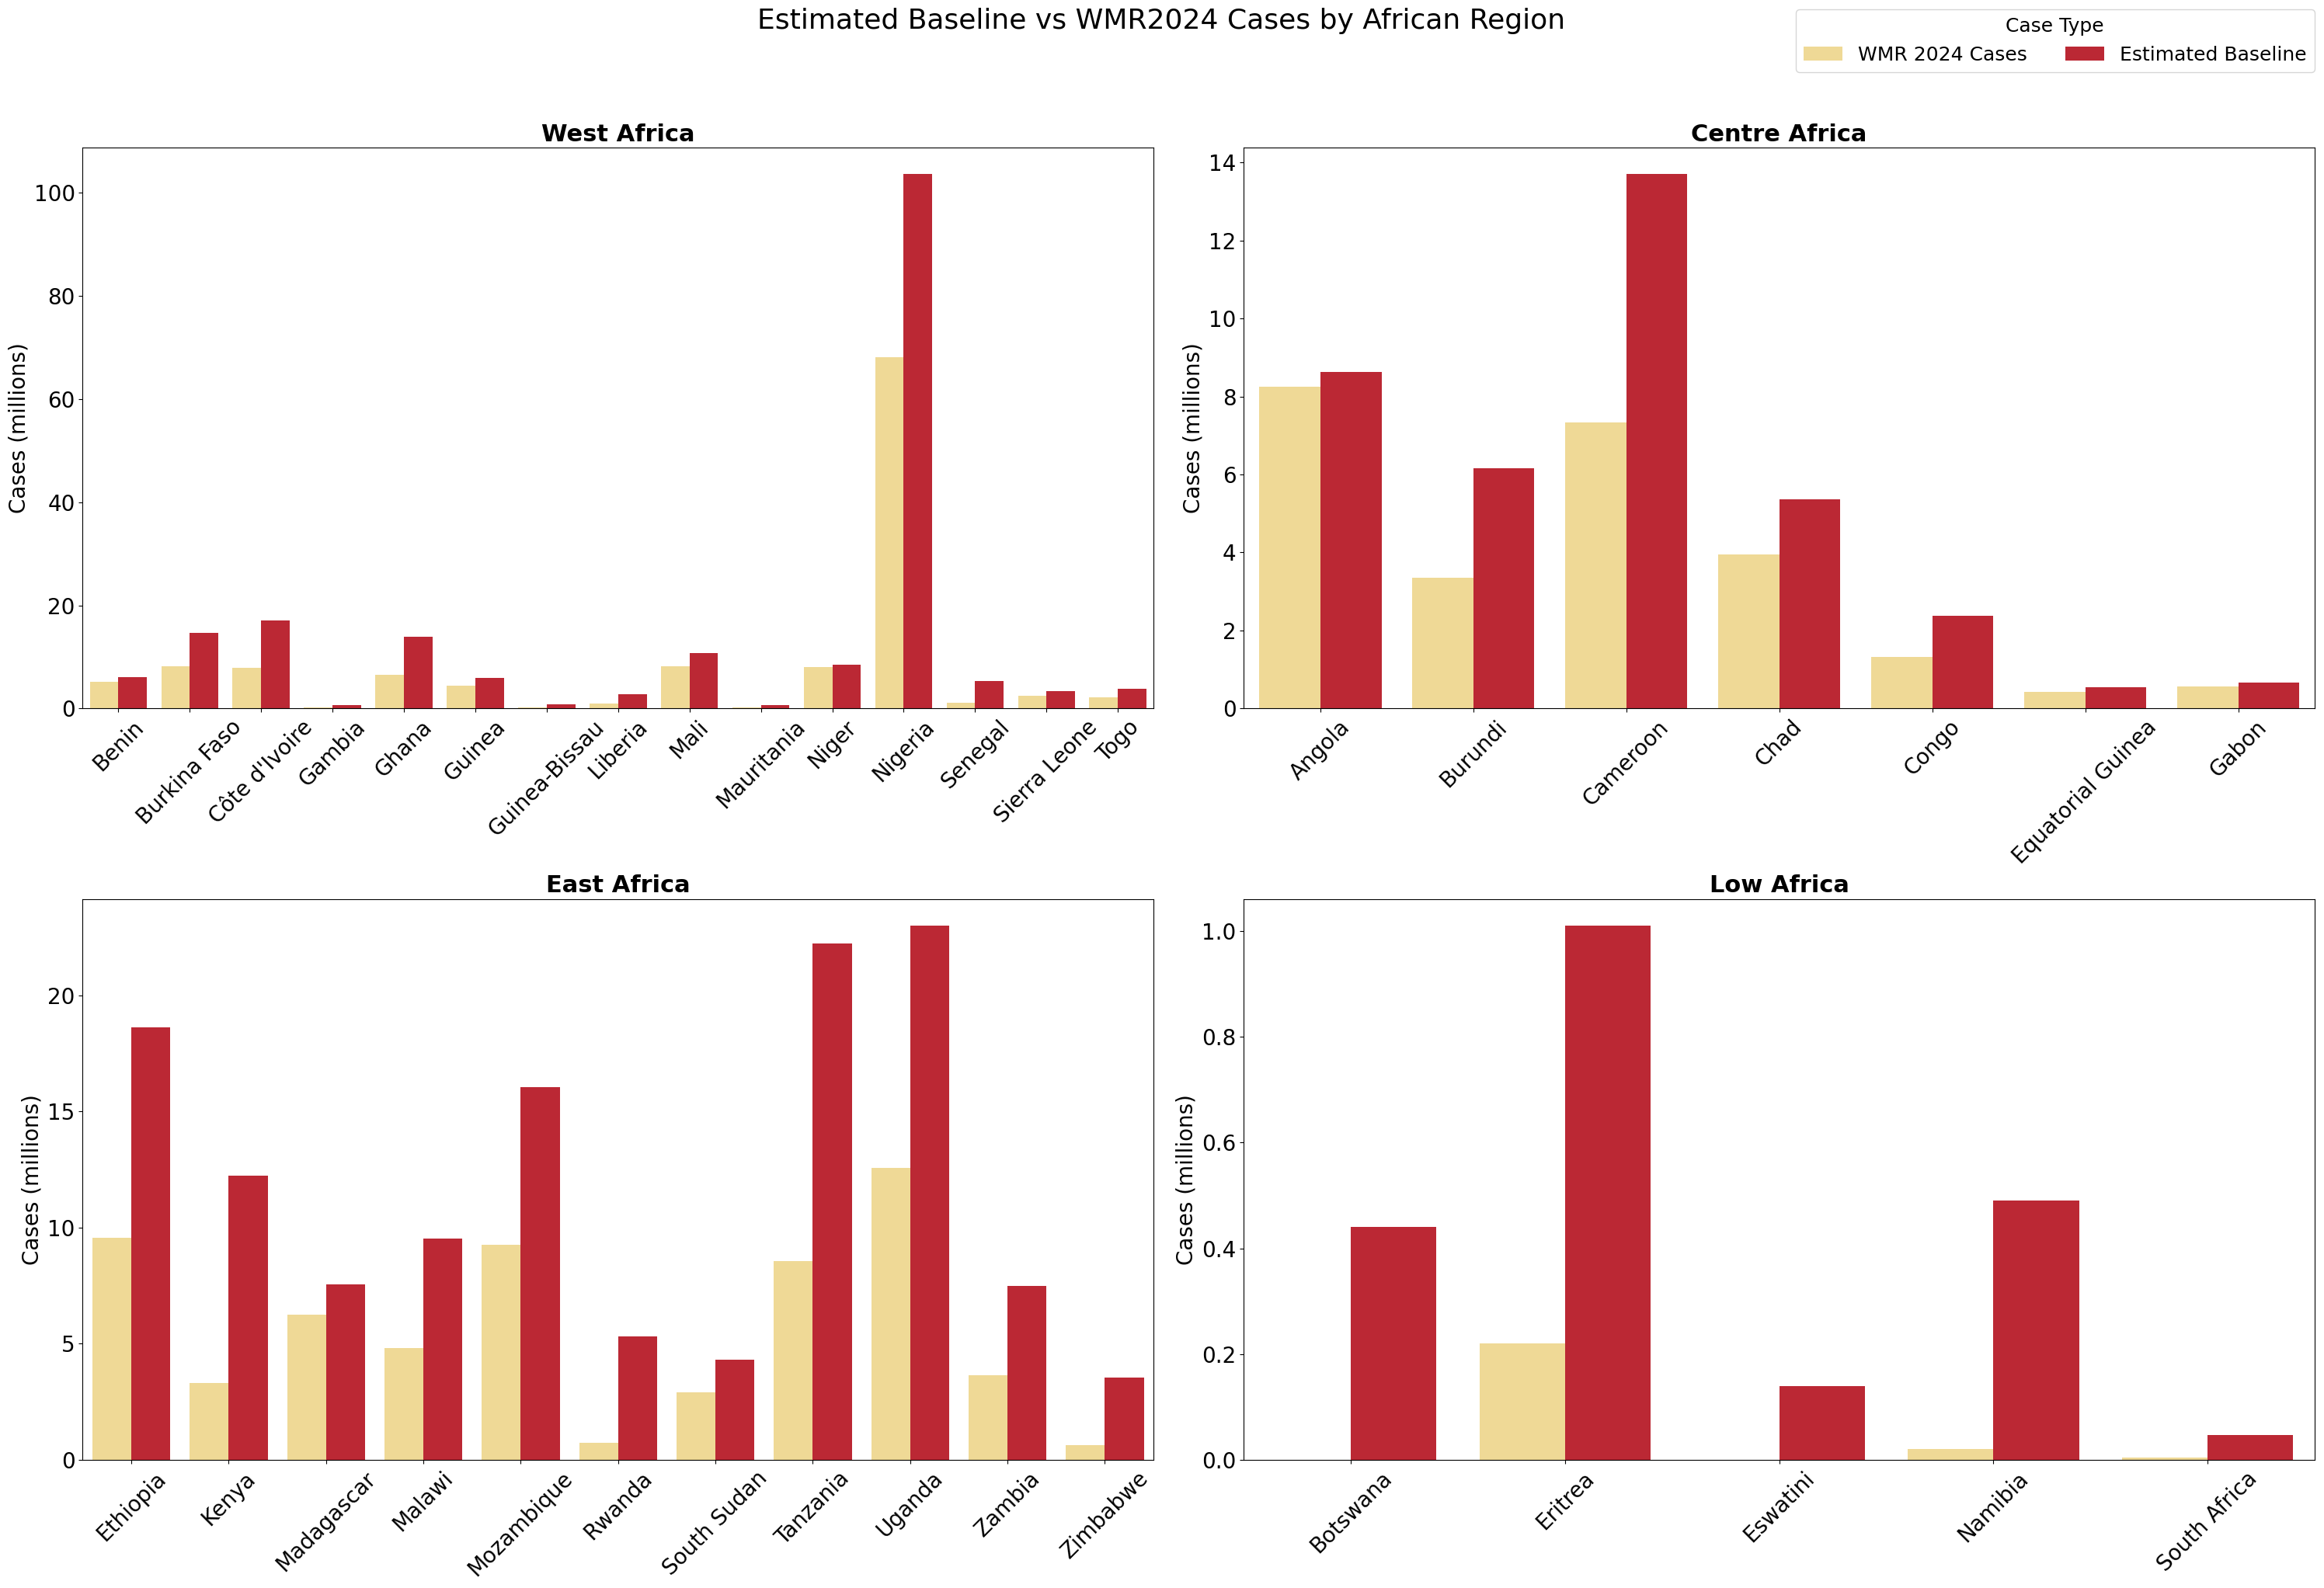

In [55]:
df_dict = {
    "West": df_west,
    "Centre": df_centre,
    "East": df_east,
    "Low": df_low
}


# Define color map
cmap = plt.get_cmap("YlOrRd")
wmr_color = cmap(0.2)  # Light yellow
baseline_color = cmap(0.8)  # Deep red
colors = [wmr_color, baseline_color]
hue_order = ["WMR 2024 Cases", "Estimated Baseline"]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(30, 20))
axes = axes.flatten()

# Loop through regions
for i, (region, df) in enumerate(df_dict.items()):
    # Melt and map case types
    data_melted = df.melt(id_vars=["Country"], value_vars=["Estimated Point Cases", "WMR Point"],
                          var_name="Case Type", value_name="Cases (millions)")
    data_melted["Case Type"] = data_melted["Case Type"].map({
        "Estimated Point Cases": "Estimated Baseline",
        "WMR Point": "WMR 2024 Cases"
    })

    # Plot
    sns.barplot(
        x="Country", y="Cases (millions)",
        hue="Case Type", hue_order=hue_order,
        palette=colors, data=data_melted, ax=axes[i]
    )

    # Formatting
    axes[i].set_title(f"{region} Africa", fontsize=22, weight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Cases (millions)", fontsize=20)
    axes[i].tick_params(axis='x', rotation=45, labelsize=20)
    axes[i].tick_params(axis='y', labelsize=20)
    axes[i].legend().remove()  # Remove individual legends

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Case Type", fontsize=18, title_fontsize=18, loc='upper right', ncol=2)

# Title and layout
fig.suptitle("Estimated Baseline vs WMR2024 Cases by African Region", fontsize=26, y=1.02)
plt.tight_layout()
fig.subplots_adjust(top=0.93)  # Space for title and legend

# Save in multiple formats
fig.savefig("regional_case_estimates.svg", format="svg", bbox_inches="tight")
fig.savefig("regional_case_estimates.pdf", format="pdf", bbox_inches="tight")
fig.savefig("regional_case_estimates.png", format="png", dpi=600, bbox_inches="tight")

plt.show()